In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irrigation-scheduling/Irrigation Scheduling.csv


# **Loading the data**

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
url = '/kaggle/input/irrigation-scheduling/Irrigation Scheduling.csv'

In [4]:
#Load the data
df=pd.read_csv(url)
df

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24
...,...,...,...,...,...,...,...,...,...,...
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24


In [5]:
#To display first five records
df.head(5)

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [6]:
#To display last five records
df.tail(5)

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24
4687,4688,29.28,9922.20,-17.45,323,1,0,Dry,08-10-2022,22:06:24


In [7]:
#To display class
df['class']

0       Very Dry
1       Very Dry
2       Very Dry
3       Very Dry
4       Very Dry
          ...   
4683         Dry
4684         Dry
4685         Dry
4686         Dry
4687         Dry
Name: class, Length: 4688, dtype: object

# **Describing the data**

In [8]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [9]:
#To display number of rows and columns
df.shape

(4688, 10)

In [10]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
#To return data type of each column. 
df.dtypes

id                int64
temperature     float64
pressure        float64
altitude        float64
soilmiosture      int64
note              int64
status            int64
class            object
date             object
time             object
dtype: object

In [13]:
#To return the number of unique values for each column
df.nunique()

id              4688
temperature      426
pressure        2593
altitude         555
soilmiosture     262
note               4
status             2
class              4
date               1
time               1
dtype: int64

In [14]:
#To count the number of not empty values for each row
df.count()

id              4688
temperature     4688
pressure        4688
altitude        4682
soilmiosture    4688
note            4688
status          4688
class           4688
date            4688
time            4688
dtype: int64

# **Data Wrangling**

In [15]:
#Dropping unnecessary column 
df.drop("id",axis=1,inplace=True)

In [16]:
#Checking whether the column has been removed or not
df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [17]:
#To display the number of empty values (NaN,NAN,na) in each column
df.isna()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4683,False,False,False,False,False,False,False,False,False
4684,False,False,False,False,False,False,False,False,False
4685,False,False,False,False,False,False,False,False,False
4686,False,False,False,False,False,False,False,False,False


In [18]:
#Count the number of empty values (NaN,NAN,na) in each column
df.isna().sum()

temperature     0
pressure        0
altitude        6
soilmiosture    0
note            0
status          0
class           0
date            0
time            0
dtype: int64

In [19]:
#Filling the empty values(NaN,NAN,na) of column Altitude with average of all values of same column
df['altitude'].fillna(int(df['altitude'].mean()),inplace=True)

In [20]:
#Now checking the number of empty values (NaN,NAN,na) in Altitude column
df['altitude'].isna().sum()

0

In [21]:
#Checking the number of non empty values of each class
df['class'].value_counts()

Very Wet    1842
Wet         1457
Very Dry    1023
Dry          366
Name: class, dtype: int64

In [22]:
#Another method
df.groupby('class').size()

class
Dry          366
Very Dry    1023
Very Wet    1842
Wet         1457
dtype: int64

# **Exploratory Data Analysis**

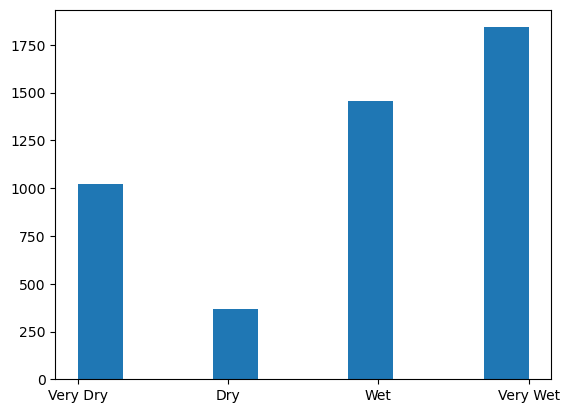

In [23]:
#Visualization of data using matplotlib.pyplot library
import matplotlib.pyplot as plt
plt.hist(df['class'])
plt.show()

In [24]:
#Again getting number of non empty values of each class
df.groupby('class').size()

class
Dry          366
Very Dry    1023
Very Wet    1842
Wet         1457
dtype: int64

In [25]:
#Putting the count in a list
List=[366,1023,1842,1457]

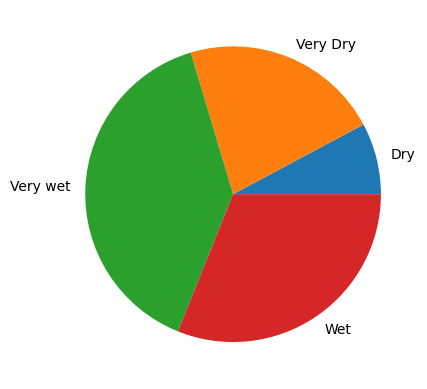

In [26]:
#Visualizing it using piechart
import matplotlib.pyplot as plt
plt.pie(List,labels=["Dry","Very Dry","Very wet","Wet"])
plt.show()

<Axes: xlabel='class', ylabel='count'>

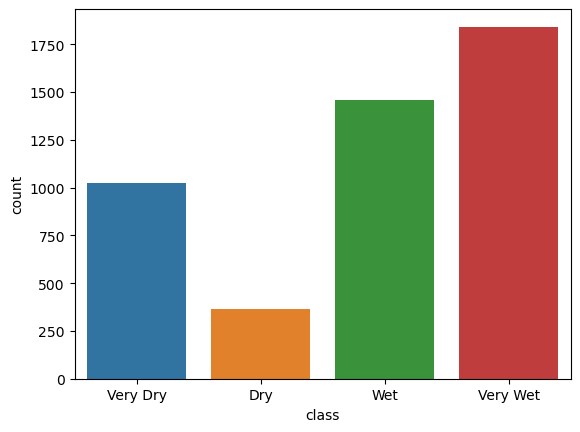

In [27]:
#Visualization of data using seaborn library
import seaborn as sns
#Visualizing class using countplot
#A count plot is helpful when dealing with categorical values. It is used to plot the frequency of the different categories.
sns.countplot(x='class',data=df)

# **Encoding categorical values**

In [28]:
#To display the values of column class
df.iloc[:,6].values

array(['Very Dry', 'Very Dry', 'Very Dry', ..., 'Dry', 'Dry', 'Dry'],
      dtype=object)

In [29]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['class']=onehot_encoder.fit_transform(df[['class']]).toarray()
df['class'].values

array([0., 0., 0., ..., 1., 1., 1.])

In [30]:
#Now checking data type of column class
df['class'].dtype

dtype('float64')

In [31]:
#To display first 5 rows of new data
df.head(5)

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,0.0,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,0.0,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,0.0,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,0.0,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,0.0,08-10-2022,22:06:24


# **Correlation of columns**

In [32]:
#Finding the correlation 
#corr() function tells us how one column can influence the other
data=df.iloc[:,0:7].corr()
data

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.290575,-0.139279,0.034205,0.028588,-0.027064
pressure,0.069229,1.000000,0.695914,-0.054813,-0.007703,0.003589,-0.003265
altitude,0.290575,0.695914,1.000000,-0.134397,0.076287,0.087809,-0.112191
soilmiosture,-0.139279,-0.054813,-0.134397,1.000000,-0.969905,-0.894602,0.291649
note,0.034205,-0.007703,0.076287,-0.969905,1.000000,0.908939,-0.221729
status,0.028588,0.003589,0.087809,-0.894602,0.908939,1.000000,-0.448475
class,-0.027064,-0.003265,-0.112191,0.291649,-0.221729,-0.448475,1.000000


<Axes: >

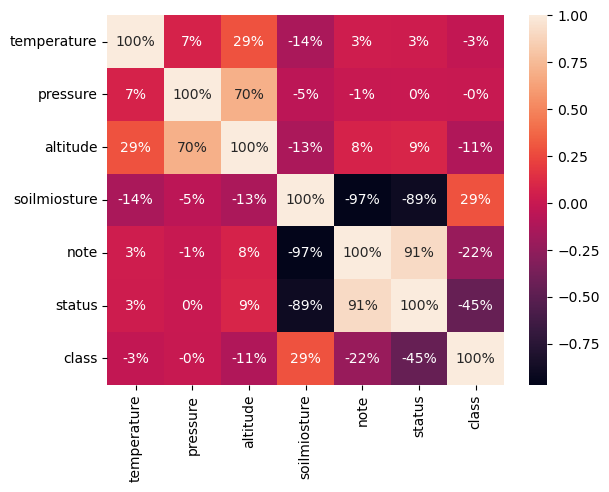

In [33]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data,annot=True,fmt='.0%')

# **Machine Learning**

In [34]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,0:4].values  #Independent dataset 
Y=df.iloc[:,6].values    #Dependent dataset 

In [35]:
print(X)

[[  29.1  9984.53  -12.21  377.  ]
 [  29.08 9984.36  -12.22  379.  ]
 [  29.06 9984.56  -12.2   376.  ]
 ...
 [  29.29 9921.48  -17.51  328.  ]
 [  29.26 9921.51  -17.51  327.  ]
 [  29.28 9922.2   -17.45  323.  ]]


In [36]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [37]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train

array([[-1.45684277e-01,  1.22858351e-02,  7.87251455e-01,
        -1.36027109e-01],
       [-2.26787465e-01, -1.34352582e-02, -3.92021632e-01,
         1.27957479e+00],
       [ 5.29357750e-02,  4.87766487e-04,  2.47343295e-01,
        -1.00111716e+00],
       ...,
       [-2.35063301e-01,  7.54053459e-03,  5.70577785e-01,
        -9.48687457e-01],
       [-1.20856771e-01, -3.05817237e-03,  8.39500357e-02,
         1.25335994e+00],
       [ 1.65220987e-02, -3.39060414e-03,  6.61898988e-02,
        -1.04043943e+00]])

In [40]:
X_test

array([[-1.04305100e-01,  4.15103421e-03,  4.14288581e-01,
         1.64658269e+00],
       [-9.43740972e-02,  1.67409162e-03,  3.00623705e-01,
         1.16160796e+00],
       [ 1.55556135e-01, -2.68889674e-02, -1.01007439e+00,
        -1.00111716e+00],
       ...,
       [ 1.15565974e-02,  1.19173964e-03,  2.79311541e-01,
         1.18782281e+00],
       [-2.44994304e-01, -2.44576527e-02, -8.99961546e-01,
         1.05674856e+00],
       [-2.36718468e-01,  7.42320573e-03,  5.63473731e-01,
        -9.22472607e-01]])

In [41]:
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0.

**Model 1: Logistic Regression**

In [43]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [44]:
# prediction of this model 
pred1=model1.predict(X_test)

In [45]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred1)

0.9093816631130064

In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred1))

[[853   0]
 [ 85   0]]


In [47]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 2: Gaussian Naive Bayes Classifier**

In [48]:
#Fitting the Gaussian Naive Bayes Classifier model on X and Y
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,Y_train) 

GaussianNB()

In [49]:
#prediction of this model
pred2=model2.predict(X_test)

In [50]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred2)

0.8699360341151386

In [51]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred2))

[[737 116]
 [  6  79]]


In [52]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       853
         1.0       0.41      0.93      0.56        85

    accuracy                           0.87       938
   macro avg       0.70      0.90      0.74       938
weighted avg       0.94      0.87      0.89       938



**Model 3: Support Vector Classifier**

In [53]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(X_train,Y_train) 

SVC(kernel='linear')

In [54]:
# prediction of this model 
pred3=model3.predict(X_test)

In [55]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred3))

0.9093816631130064


In [56]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred3))

[[853   0]
 [ 85   0]]


In [57]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
